<a href="https://colab.research.google.com/github/ilmahamala/Heart-Disease-Modelling/blob/main/SC62414_Ilma_Hamala_Nur_Faiza_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Import Library**

In [ ]:
# Base library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling
from sklearn.preprocessing import StandardScaler, LabelEncoder
from mlxtend.preprocessing import minmax_scaling
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve, RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV, KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample

# Others
import warnings
warnings.filterwarnings("ignore")

### **Load Dataset**

In [ ]:
# Import Dataset
df = pd.read_csv('/content/heart_datapreprocessing.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,risk_category,age_category,exercise_intensity,Trestbps_category,chol_category,AgeSex_risk,Thalach_condition,Thalach&trestecg_risk,slope&thalach_risk,exercise_heart_response
0,52,1,0,125,212,0,1,168,0,1.0,...,Sedang,Dewasa,1,Prehipertensi,normal,high,normal,Y,tinggi,abnormal
1,53,1,0,140,203,1,0,155,1,3.1,...,Rendah,Pra lanjut usia,1,Hipertensi,normal,high,normal,N,rendah,abnormal
2,70,1,0,145,174,0,1,125,1,2.6,...,Rendah,Lansia,0,Hipertensi,normal,low,normal,Y,rendah,abnormal
3,61,1,0,148,203,0,1,161,0,0.0,...,Sedang,Lansia,1,Hipertensi,normal,low,abnormal,Y,tinggi,normal
4,62,0,0,138,294,1,1,106,0,1.9,...,Rendah,Lansia,0,Hipertensi,high,low,abnormal,Y,rendah,abnormal


### **Label Encoding**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283 entries, 0 to 282
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      283 non-null    int64  
 1   sex                      283 non-null    int64  
 2   cp                       283 non-null    int64  
 3   trestbps                 283 non-null    int64  
 4   chol                     283 non-null    int64  
 5   fbs                      283 non-null    int64  
 6   restecg                  283 non-null    int64  
 7   thalach                  283 non-null    int64  
 8   exang                    283 non-null    int64  
 9   oldpeak                  283 non-null    float64
 10  slope                    283 non-null    int64  
 11  ca                       283 non-null    int64  
 12  thal                     283 non-null    int64  
 13  target                   283 non-null    int64  
 14  risk_cp                  2

In [ ]:
encoder = LabelEncoder()
categorical_features = ['risk_category','age_category','Trestbps_category','chol_category','AgeSex_risk','Thalach_condition','Thalach&trestecg_risk','slope&thalach_risk','exercise_heart_response']

for col in categorical_features:
  df[col] = encoder.fit_transform(df[col])

df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,risk_category,age_category,exercise_intensity,Trestbps_category,chol_category,AgeSex_risk,Thalach_condition,Thalach&trestecg_risk,slope&thalach_risk,exercise_heart_response
0,52,1,0,125,212,0,1,168,0,1.0,...,1,0,1,2,1,0,1,1,1,0
1,53,1,0,140,203,1,0,155,1,3.1,...,0,2,1,0,1,0,1,0,0,0
2,70,1,0,145,174,0,1,125,1,2.6,...,0,1,0,0,1,1,1,1,0,0
3,61,1,0,148,203,0,1,161,0,0.0,...,1,1,1,0,1,1,0,1,1,1
4,62,0,0,138,294,1,1,106,0,1.9,...,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278,68,0,2,120,211,0,0,115,0,1.5,...,0,1,0,2,1,1,0,1,0,0
279,44,0,2,108,141,0,1,175,0,0.6,...,1,3,1,1,1,0,1,1,0,1
280,52,1,0,128,255,0,1,161,1,0.0,...,1,0,1,2,0,0,1,1,1,1
281,59,1,3,160,273,0,0,125,0,0.0,...,1,2,0,0,0,0,0,1,1,1


***
Standar Scaler
***

In [ ]:
#numerical_features = df.select_dtypes(include=['number']).columns.tolist()
#df = minmax_scaling(df, columns=numerical_features)
#df

### **Data Splitting**

In [ ]:
# memisahkan variabel independen dan dependen
X = df.drop("target", axis=1)
y = df["target"]

# Membagi data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **Model Fitting**


Algoritma yang digunakan, diantaranya adalah:
1. XGBoost
2. Decision Tree
3. KNN
4. Logistic Regression

Algoritma classification tersebut digunakan karena cocok diterapkan pada data prediksi penyakit (data biner).

In [ ]:
models = {
    "XGBoost": XGBClassifier(objective='binary:logistic', random_state=42),
    "Decision Tree": DecisionTreeClassifier(max_depth=3),
    "KNN" : KNeighborsClassifier(n_neighbors=5),
    "Logistic Regression" : LogisticRegression()
}

df_model_fitting = pd.DataFrame(columns=["Model Name", "Accuracy"])

for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    df_model_fitting.loc[len(df_model_fitting)] = [name, accuracy]

before_crossval = df_model_fitting.copy()
before_crossval

,Model Name,Accuracy
0,XGBoost,0.807018
1,Decision Tree,0.789474
2,KNN,0.614035
3,Logistic Regression,0.859649


Insight
***

Setelah beberapa algoritma diatas diterapkan kedalam data 'heart_datapreprocessing', algoritma Logistic Regression memiliki akurasi tertinggi yaitu 85.96% kemudian disusul XGBoost yang memiliki akurasi sebesar 80.70%

### **Cross-Validation & Learning Curves**

Namun, akurasi model yang diperoleh dari satu split data (train-test split) tidak selalu mencerminkan performa model pada data, maka selanjutnya bisa dilakukan cross-validation yang membagi data menjadi beberapa bagian dan melatih model pada setiap bagian dengan data yang berbeda. Kemudian dibuat learning curves untuk mengetahui ukuran antara data training dan testing dan mengetahui model terbaik.

In [ ]:
# Cross-validation
results_df = pd.DataFrame(columns=["Model Name", "Score of Accuracy", "Mean of Accuracy", "Std of Accuracy"])

for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5)
    results_df.loc[len(results_df)] = [name, scores, np.mean(scores), np.std(scores)]

before_tuning = results_df.copy()
before_tuning

,Model Name,Score of Accuracy,Mean of Accuracy,Std of Accuracy
0,XGBoost,"[0.8043478260869565, 0.8444444444444444, 0.8, ...",0.809758,0.045622
1,Decision Tree,"[0.7391304347826086, 0.8888888888888888, 0.755...",0.787826,0.059630
2,KNN,"[0.6739130434782609, 0.6444444444444445, 0.6, ...",0.632560,0.037619
3,Logistic Regression,"[0.8043478260869565, 0.8222222222222222, 0.866...",0.818647,0.029004


In [ ]:
before_crossval

,Model Name,Accuracy
0,XGBoost,0.807018
1,Decision Tree,0.789474
2,KNN,0.614035
3,Logistic Regression,0.859649



Insight
***
1. Terdapat peningkatan akurasi pada algoritma XGBoost, decision tree, dan KNN
2. Terdapat penurunan akurasi pada algoritma logistic regression. Penurunan ini dapat terjadi overfitting maupun underfitting.

Selanjutnya dibuat learning curves yang menunjukkan hubungan antara jumlah data yang digunakan untuk melatih model dan akurasi model. Hal ini membantu untuk mengidentifikasi apakah model overfitting (terlalu pada detail kecil pada data training) atau underfitting (tidak belajar cukup banyak dari data training).


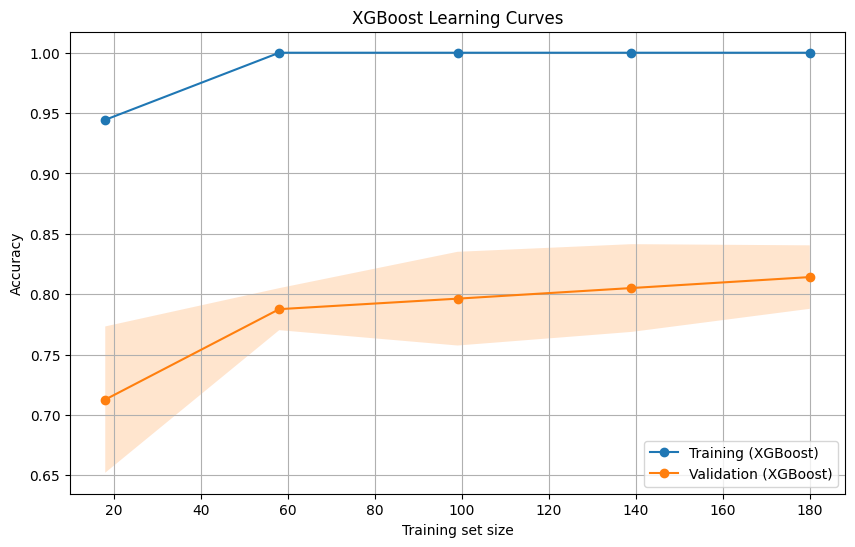

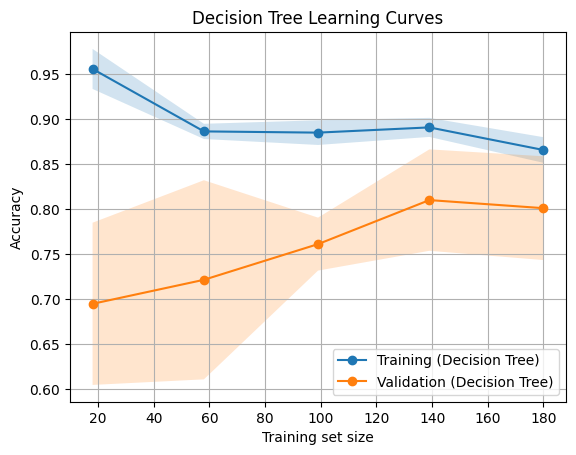

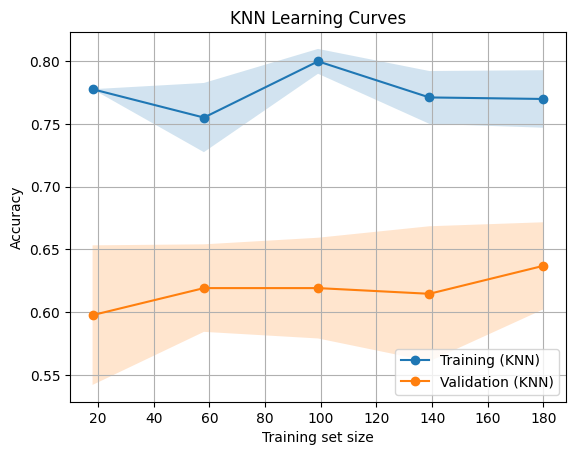

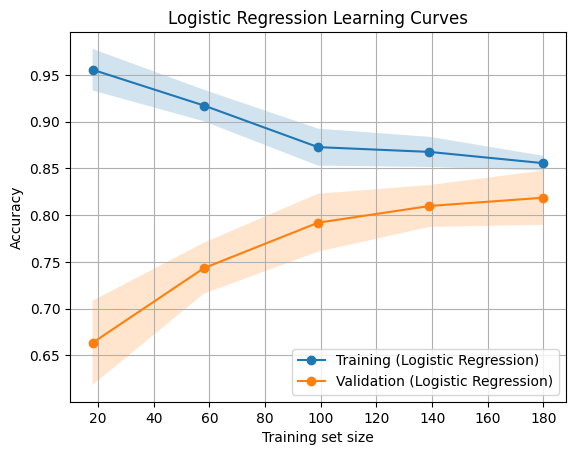

In [ ]:
plt.figure(figsize=(10, 6))

for i, (name, model) in enumerate(models.items()):
    train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5)

    plt.fill_between(train_sizes, train_scores.mean(axis=1) - train_scores.std(axis=1),
                     train_scores.mean(axis=1) + train_scores.std(axis=1), alpha=0.2)
    plt.plot(train_sizes, train_scores.mean(axis=1), 'o-', label=f"Training ({name})")

    plt.fill_between(train_sizes, test_scores.mean(axis=1) - test_scores.std(axis=1),
                     test_scores.mean(axis=1) + test_scores.std(axis=1), alpha=0.2)
    plt.plot(train_sizes, test_scores.mean(axis=1), 'o-', label=f"Validation ({name})")

    plt.legend(loc="lower right")
    plt.xlabel("Training set size")
    plt.ylabel("Accuracy")
    plt.title(f'{name} Learning Curves')
    plt.grid(True)
    plt.show()

Insight
***
1. Learning curves XGBoost:
- Training menunjukkan peningkatan yang signifikan dari sekitar 0.94 hingga 1.00. Hal ini menunjukkan bahwa model mungkin mengalami overfitting, di mana model terlalu fokus pada data training
- Testing accuracy menunjukkan peningkatan yang positif dari sekitar 0.72 hingga 0.82. Hal ini menunjukkan bahwa model mampu belajar dan menghasilkan prediksi yang akurat pada data baru

2. Learning curves decision tree:
- Training loss menunjukkan penurunan yang signifikan dari sekitar 0.96 hingga 0.87. Hal ini menunjukkan bahwa model belajar dengan baik dan mampu meminimalkan error pada data training
- Testing accuracy menunjukkan peningkatan yang positif dari sekitar 0.72 hingga 0.78. Hal ini menunjukkan bahwa model mampu menggeneralisasikan pengetahuan yang diperoleh dari data training ke data testing


3. Learning curves KNN:
- Training loss menunjukkan perubahan yang kecil, yaitu dari sekitar 0.78 hingga 0.77. Hal ini menunjukkan bahwa model mungkin telah mencapai titik optimal dalam pembelajarannya.
- Testing accuracy menunjukkan perubahan yang kecil, yaitu dari sekitar 0.60 hingga 0.64. Hal ini menunjukkan bahwa model belum mampu menggeneralisasikan pengetahuan dengan baik ke data baru yang belum pernah dilihat sebelumnya
- Learning curves ini menunjukkan bahwa model belum optimal

4. Learning curves logistic regression:
- pada awal, training secara signifikan jauh lebih tinggi daripada testing yang menunjukkan bahwa model terlalu menghafal data training
- training menunjukkan penurunan (training loss) dari sekitar 0,95 hingga 0,85. Hal ini menunjukkan bahwa model belajar dengan baik dan mampu meminimalkan error pada data training
- testing menunjukkan kenaikan dari sekitar 0,66 hingga 0,82. Hal ini menunjukkan bahwa model mampu menggeneralisasikan pengetahuan yang diperoleh dari data training ke data testing dan tidak menunjukkan overfitting

### **Hyperparameter Tuning**

Selanjutnya dilakukan hyperparameter tuning yang mencari nilai optimal dari hyperparameter yang dapat meningkatkan performa model. Metode yang digunakan pada hyperparameter tuning ini menggunakan random search yang memilih nilai hyperparameter secara acak dan memilih yang menghasilkan performa terbaik.

In [ ]:
# parameter distribution

# Decision Tree
param_dist_dt = {
    'max_depth': [3, 5, 10, 14],
    'min_samples_split': [2, 5, 10, 3, 4, 8],
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf': [1, 2, 4, 8]
}

# XGBoost
param_dist_xgb = {
    "reg_alpha":[1e-5, 1e-2, 0.1, 100],
    "max_depth" : [3, 5, 7, 9],
    "C": np.logspace(-4, 0.0001, 4, 5),
    "kernel": ["linear", "rbf"],
    "gamma": np.logspace(-3, 1, 3, 5),
    "max_depth": [3, 5, 10],
    "learning_rate": [0.1, 0.01],
    "n_estimators": [100, 200]
}

# KNN
param_dist_knn = {
    "n_neighbors": np.arange(1, 21),
    "weights": ["uniform", "distance"],
    "algorithm": ["auto", "ball_tree", "kd_tree"]
}

# Logistic Regression
param_dist_lr = {
    "C": np.logspace(-4, 4, 20),
    "penalty": ["l1", "l2"],
    "solver": ["lbfgs", "newton-cg"],
    "max_iter": [100, 200, 300],
    "tol": [1e-3, 1e-4, 1e-5],
}

In [ ]:
# RandomizedSearchCV - Decision Tree
dt_model = models["Decision Tree"]
random_search_dt = RandomizedSearchCV(estimator=dt_model, param_distributions=param_dist_dt, n_iter=100, cv=5, random_state=0)
random_search_dt.fit(X, y)

print("Best parameters for Decision Tree:", random_search_dt.best_params_)
print("Best accuracy score for Decision Tree:", random_search_dt.best_score_)

Best parameters for Decision Tree: {'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 3, 'criterion': 'entropy'}
Best accuracy score for Decision Tree: 0.7881578947368422


In [ ]:
# RandomizedSearchCV - XGBoost
xgb_model = models["XGBoost"]
random_search_xgb = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_dist_xgb, n_iter=100, cv=5, random_state=0)
random_search_xgb.fit(X, y)

print("Best parameters for XGBoost:", random_search_xgb.best_params_)
print("Best accuracy score for XGBoost:", random_search_xgb.best_score_)

Best parameters for XGBoost: {'reg_alpha': 1e-05, 'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.01, 'kernel': 'linear', 'gamma': 10.0, 'C': 0.0001}
Best accuracy score for XGBoost: 0.8444235588972431


In [ ]:
# RandomizedSearchCV - KNN
knn_model = models["KNN"]
random_search_knn = RandomizedSearchCV(estimator=knn_model, param_distributions=param_dist_knn, n_iter=100, cv=5, random_state=0)
random_search_knn.fit(X, y)

print("Best parameters for KNN:", random_search_knn.best_params_)
print("Best accuracy score for KNN:", random_search_knn.best_score_)

Best parameters for KNN: {'weights': 'uniform', 'n_neighbors': 13, 'algorithm': 'auto'}
Best accuracy score for KNN: 0.6781954887218045


In [ ]:
# RandomizedSearchCV - Logistic Regression
lr_model = models["Logistic Regression"]
random_search_lr = RandomizedSearchCV(estimator=lr_model, param_distributions=param_dist_lr, n_iter=100, cv=5, random_state=0)
random_search_lr.fit(X, y)

print("Best parameters for Logistic Regression:", random_search_lr.best_params_)
print("Best accuracy score for Logistic Regression:", random_search_lr.best_score_)

Best parameters for Logistic Regression: {'tol': 0.001, 'solver': 'lbfgs', 'penalty': 'l2', 'max_iter': 100, 'C': 0.23357214690901212}
Best accuracy score for Logistic Regression: 0.8266917293233084


In [ ]:
# Remodeling hyperparameter tuning
dt_model_tuned = DecisionTreeClassifier(**random_search_dt.best_params_)
knn_model_tuned = KNeighborsClassifier(**random_search_knn.best_params_)
xgb_model_tuned = XGBClassifier(**random_search_xgb.best_params_)
lr_model_tuned = LogisticRegression(**random_search_lr.best_params_)

evaluation_results_tuned = {'Model Name': [], 'Score of Accuracy': [], 'Mean of Accuracy': [], 'Std of Accuracy': []}

for model_name, model in {"XGBoost" : xgb_model_tuned, "Decision Tree" : dt_model_tuned, "KNN" : knn_model_tuned, "Logistic Regression" : lr_model_tuned}.items():
    scores = cross_val_score(model, X, y, cv=5)

    evaluation_results_tuned['Model Name'].append(model_name)
    evaluation_results_tuned['Score of Accuracy'].append(scores)
    evaluation_results_tuned['Mean of Accuracy'].append(np.mean(scores))
    evaluation_results_tuned['Std of Accuracy'].append(np.std(scores))

evaluation_df_tuned = pd.DataFrame(evaluation_results_tuned)

after_tuning = pd.DataFrame(data=evaluation_results_tuned)
print('After tuning:')
after_tuning

After tuning:


,Model Name,Score of Accuracy,Mean of Accuracy,Std of Accuracy
0,XGBoost,"[0.7894736842105263, 0.8421052631578947, 0.929...",0.844424,0.046633
1,Decision Tree,"[0.7368421052631579, 0.8421052631578947, 0.736...",0.788158,0.043638
2,KNN,"[0.6666666666666666, 0.7192982456140351, 0.719...",0.678195,0.036461
3,Logistic Regression,"[0.7894736842105263, 0.8245614035087719, 0.912...",0.826692,0.044236


In [ ]:
print('Before tuning:')
before_tuning

Before tuning:


,Model Name,Score of Accuracy,Mean of Accuracy,Std of Accuracy
0,XGBoost,"[0.8043478260869565, 0.8444444444444444, 0.8, ...",0.809758,0.045622
1,Decision Tree,"[0.7391304347826086, 0.8888888888888888, 0.755...",0.787826,0.059630
2,KNN,"[0.6739130434782609, 0.6444444444444445, 0.6, ...",0.632560,0.037619
3,Logistic Regression,"[0.8043478260869565, 0.8222222222222222, 0.866...",0.818647,0.029004


Insight
***
1. Semua model mengalami peningkatan
2. Peningkatan akurasi menunjukkan proses hyperparamter tuning ini berhasil menemukan kombinasi hyperparameter yang lebih baik
3. Peningkatan akurasi yang kecil menunjukkan bahwa nilai hyperparameter yang optimal belum ditemukan
4. Dengan hyperparameter tuning didapat beberapa parameter terbaik

### **Bootstrapping**

In [ ]:
results = {}

for model_name, model in models.items():
    predictions = []
    n_estimators = 100

    for _ in range(n_estimators):
        X_boot, y_boot = resample(X_train, y_train, random_state=np.random.randint(100))
        model.fit(X_boot, y_boot)
        y_pred = model.predict(X_test)
        predictions.append(y_pred)

    final_predictions = np.mean(predictions, axis=0)

    # Threshold prediksi untuk nilai biner
    threshold = 0.5
    final_predictions_binary = [1 if pred > threshold else 0 for pred in final_predictions]
    accuracy = accuracy_score(y_test, final_predictions_binary)
    results[model_name] = {"accuracy": accuracy, "predictions": final_predictions_binary}

evaluation_results = {'Model Name': [], 'Score of Accuracy': []}

for model_name, result in results.items():
    # Store mean accuracy
    evaluation_results['Model Name'].append(model_name)
    evaluation_results['Score of Accuracy'].append(result['accuracy'])

after_bootstrapping = pd.DataFrame(data=evaluation_results)
print('After bootstrapping:')
after_bootstrapping

After bootstrapping:


,Model Name,Score of Accuracy
0,XGBoost,0.859649
1,Decision Tree,0.807018
2,KNN,0.596491
3,Logistic Regression,0.842105


In [ ]:
# Score sebelum bootstrapping
print('Before bootstrapping:')
after_tuning

Before bootstrapping:


,Model Name,Score of Accuracy,Mean of Accuracy,Std of Accuracy
0,XGBoost,"[0.7894736842105263, 0.8421052631578947, 0.929...",0.844424,0.046633
1,Decision Tree,"[0.7368421052631579, 0.8421052631578947, 0.736...",0.788158,0.043638
2,KNN,"[0.6666666666666666, 0.7192982456140351, 0.719...",0.678195,0.036461
3,Logistic Regression,"[0.7894736842105263, 0.8245614035087719, 0.912...",0.826692,0.044236


Insight
***
1. terdapat peningkatan akurasi pada algoritma XGBoost, decision tree, dan logistic regression
2. terdapat penurunan akurasi pada algoritma KNN karena algoritma ini sensitif terhadap noise, sedangkan bootsrapping dapat memperkuat noise

### **Metric Evaluation - ROC Curve**

ROC curve digunakan sebagai pengukur performance untuk classification problem dalam menentukan threshold model terbaik. Default pada threshold umumnya adalah 0.5

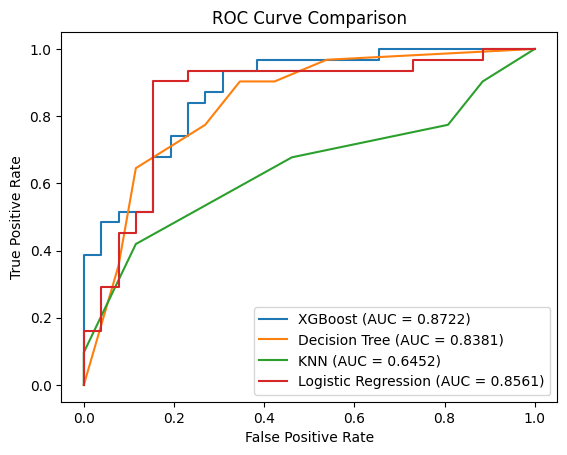

In [ ]:
def plot_roc_curve(model_name, model, X_test, y_test):
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # mendefinisikan metrics
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)

    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.4f})')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve Comparison')
    plt.legend()

for model_name, model in models.items():
    model.fit(X_train, y_train)
    plot_roc_curve(model_name, model, X_test, y_test)

plt.show()

Insight
***
1. True positive rate memiliki rumus True Positive/(True Positif + False Negative). jika hasilnya semakin mendekati 1 maka data terklasifikasi dengan benar

2. False negative rate memiliki rumus False Positive/(False Positive + True Negative). jika hasilnya semakin mendekati 1 maka data tidak terklasifikasi dengan benar

3. ROC juga memiliki fungsi untuk menentukan threshold terbaik. Semakin tinggi True Positive Rate dan semakin kecil False Positive Rate maka thresholdnya semakin bagus. Dapat disimpulkan perkiraan nilai threshold terbaik pada setiap model, diantaranya adalah:
- XGBoost: 0.4
- Decision tree: 0.65
- KNN: 0.4
- Logistic regression: 0.9

4. Nilai AUC (Area Under the Curve) yang merupakan luas area dibawah curve ROC memudahkan kita dalam membandingkan beberapa model. Model yang baik adalah model yang memiliki AUC paling besar, karena memiliki titik TP yang lebih tinggi atau titik FP yang lebih rendah. Dapat disimpulkan bahwa model terbaik adalah XGBoost (0.8722) disusul dengan linear regression (0.8561) dan decision tree (0.8381)
